In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [3]:
data_frame = pd.read_csv("Salestrain.csv")
data_frame = data_frame['data'].values
data_frame.shape

(96,)

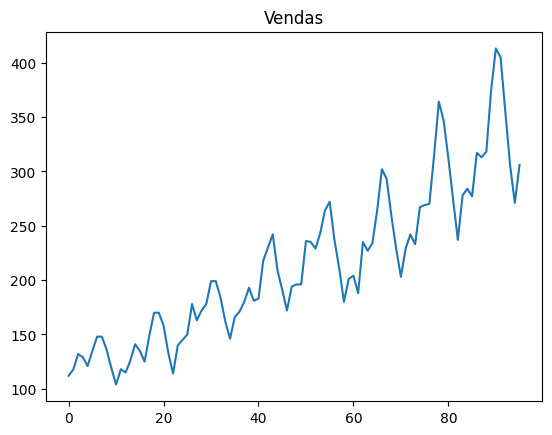

In [4]:
plt.plot(data_frame, label="dados")
plt.title("Vendas")
plt.show()

In [5]:
stl = STL(data_frame, period=12)
result = stl.fit()

In [ ]:
result.resid

In [9]:
anomalies = np.where(np.abs(result.resid) > 2.5 * np.std(result.resid))[0]

In [10]:
anomalies

array([51, 61])

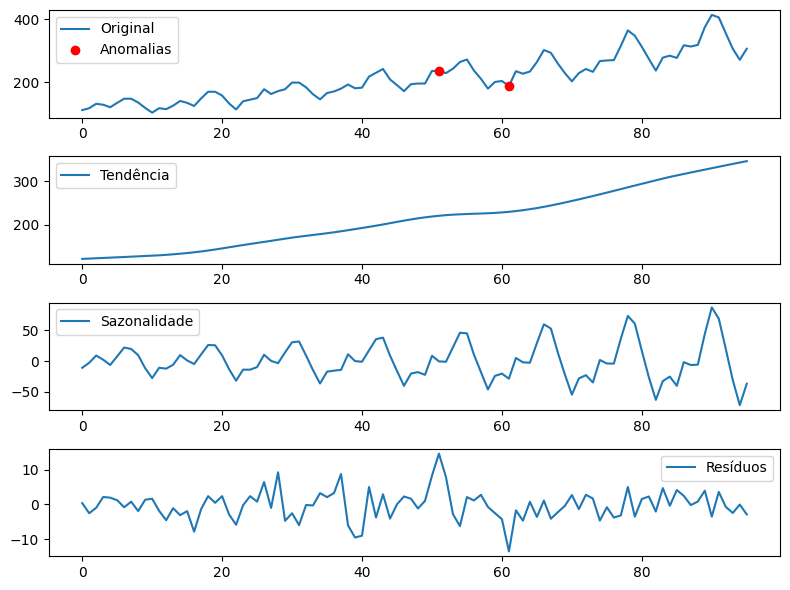

In [14]:
plt.figure(figsize=(8,6))

plt.subplot(411)
plt.plot(data_frame, label='Original')
plt.plot(anomalies, data_frame[anomalies], 'ro', markersize=6, label="Anomalias")
plt.legend(loc='best')

plt.subplot(412)
plt.plot(result.trend, label='Tendência')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(result.seasonal, label='Sazonalidade')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(result.resid, label="Resíduos")
plt.legend(loc='best')

plt.tight_layout()
plt.show()